In [1]:
%matplotlib inline

In [2]:
import io
import sys
sys.path.insert(0, '..')

import pandas as pd
import seaborn as sns

import covid19

In [3]:
it_data_text = '''
date,cases,deaths,healed,critical,severe
2020-02-21, 19, 1,,,
2020-02-22, 74, 2,,,
2020-02-23, 149, 3,,,
2020-02-24, 222, 7,, 27, 101
2020-02-25, 311, 10, 1, 35, 114
2020-02-26, 385, 12, 3, 36, 128
2020-02-27, 588, 17, 45, 56, 248
2020-02-28, 821, 21, 46, 64, 345
2020-02-29, 1049, 29, 50, 105, 401
2020-03-01, 1577, 34, 83, 140, 639
2020-03-02, 1885, 52, 149, 166, 742
2020-03-03, 2263, 79, 160, 229, 1034
2020-03-04, 2703, 107, 217, 295, 1344
2020-03-05, 3296, 148, 414, 351, 1790
2020-03-06, 3916, 197, 523, 462, 2394
'''

data = pd.read_csv(io.StringIO(it_data_text), parse_dates=['date'], index_col=['date'])
data['total_cases'] = data['cases'] + data['deaths'] + data['healed']
# official data at reported by regions at 16:00 every day
data['day'] = covid19.data.to_days(data.index)

data

,cases,deaths,healed,critical,severe,total_cases,day
date,,,,,,,
2020-02-21,19,1,NaN,NaN,NaN,NaN,3.0
2020-02-22,74,2,NaN,NaN,NaN,NaN,4.0
2020-02-23,149,3,NaN,NaN,NaN,NaN,5.0
2020-02-24,222,7,NaN,27.0,101.0,NaN,6.0
2020-02-25,311,10,1.0,35.0,114.0,322.0,7.0
2020-02-26,385,12,3.0,36.0,128.0,400.0,8.0
2020-02-27,588,17,45.0,56.0,248.0,650.0,9.0
2020-02-28,821,21,46.0,64.0,345.0,888.0,10.0
2020-02-29,1049,29,50.0,105.0,401.0,1128.0,11.0


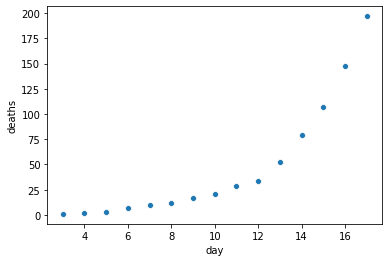

In [4]:
_ = sns.scatterplot('day', 'deaths', data=data)